## Alternative - Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Importing the dataset
dataset = pd.read_excel('PDataset4.xlsx')
X = dataset[['Explosive type', 'Explosive mass', 'Standoff distance']]
y = dataset['Peak incident pressure']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Explosive type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (new_feature_names)
print (X)

    Explosive type  Explosive mass  Standoff distance
0              TNT             0.5                1.0
1              TNT             0.5                1.5
2              TNT             0.5                2.5
3              TNT             0.5                3.5
4              TNT             0.5                4.5
..             ...             ...                ...
583  Composition B            25.0               19.5
584  Composition B            25.0               20.0
585  Composition B            25.0                2.5
586  Composition B            25.0                3.5
587  Composition B            25.0                4.5

[588 rows x 3 columns]
['encoder__Explosive type_Composition B' 'encoder__Explosive type_TNT'
 'remainder__Explosive mass' 'remainder__Standoff distance']
[[ 0.   1.   0.5  1. ]
 [ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 ...
 [ 1.   0.  25.   2.5]
 [ 1.   0.  25.   3.5]
 [ 1.   0.  25.   4.5]]


In [2]:
features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']

#Turning back into a dataframe
X = pd.DataFrame(X, columns= features)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 71)
print (X_train)

     Explosive type-CompB  Explosive type-TNT  Explosive mass  \
0                     0.0                 1.0             0.5   
1                     0.0                 1.0             0.5   
2                     0.0                 1.0             0.5   
3                     0.0                 1.0             0.5   
4                     0.0                 1.0             0.5   
..                    ...                 ...             ...   
583                   1.0                 0.0            25.0   
584                   1.0                 0.0            25.0   
585                   1.0                 0.0            25.0   
586                   1.0                 0.0            25.0   
587                   1.0                 0.0            25.0   

     Standoff distance  
0                  1.0  
1                  1.5  
2                  2.5  
3                  3.5  
4                  4.5  
..                 ...  
583               19.5  
584               2

## Training the Decision Tree Regression model on the Training set

In [3]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50,
                                  max_depth = 7,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 71)

regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, random_state=71)

## Load the model from disk

In [ ]:
import pickle
filename = 'finalized_model_RF.sav'
loaded_regressor = pickle.load(open(filename, 'rb'))

## Predicting the Test set results

In [4]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 119.43  117.57]
 [ 939.1   949.31]
 [ 191.84  200.22]
 [ 225.43  219.42]
 [ 113.29  112.12]
 [1632.24 1447.06]
 [ 145.49  150.68]
 [ 157.42  157.24]
 [ 111.06  109.06]
 [ 672.45  724.54]
 [ 404.01  417.99]
 [ 119.43  118.26]
 [ 188.29  195.43]
 [1374.22 1113.99]
 [ 114.01  114.48]
 [ 118.85  115.74]
 [ 116.51  115.79]
 [ 186.18  197.38]
 [ 118.85  117.61]
 [ 113.1   109.28]
 [ 563.01  626.02]
 [1292.42 1196.18]
 [ 107.86  110.56]
 [ 132.73  130.94]
 [ 112.65  112.99]
 [ 154.31  148.55]
 [ 118.94  119.54]
 [ 229.91  230.67]
 [ 117.11  116.75]
 [ 126.38  126.05]
 [ 106.15  104.27]
 [3491.92 3327.9 ]
 [ 125.46  124.15]
 [ 175.87  171.84]
 [2200.   2259.19]
 [ 125.46  123.17]
 [3816.56 4232.15]
 [ 184.23  167.83]
 [ 132.88  134.7 ]
 [ 117.49  114.12]
 [ 401.54  397.25]
 [ 317.54  324.37]
 [1411.33 1550.45]
 [ 401.17  403.13]
 [ 127.55  130.95]
 [ 120.16  120.33]
 [ 132.72  132.34]
 [ 115.1   113.93]
 [ 249.17  261.17]
 [ 188.92  193.11]
 [ 132.88  137.57]
 [ 188.97  203.69]
 [ 119.84  1

## SHAP

In [5]:
import shap
#print (shap.__version__)

In [ ]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

In [ ]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

In [ ]:
#Summary plot type 1
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names = features, plot_type="bar")
print (plt.gcf().set_size_inches(20,5))

In [ ]:
#Summary plot type 2
features = ['Explosive type-CompB', 'Explosive type-TNT', 'Explosive mass', 'Standoff distance']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
print (plt.get_fignums())
print ("labels",plt.get_figlabels())
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.xlim([-3000,7000])
plt.xticks(rotation=45)
#cb = plt.colorbar()
#cb.set_ticks([2,19])

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
#cb_ax.set_aspect(aspect = 1)
#print (cb_ax.get_xlim())
#print (cb_ax.get_ylim())
#print (cb_ax.get_xbound())
#print (cb_ax.get_ybound())
#cb_ax.set_xlim(0,0.0001)

#cb.set_xticklabels(['Low', 'High'])
#ax.cb.set_label("Feature Values",fontsize = 20)

In [ ]:
#features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
#Turning back into a dataframe
X_train_df = pd.DataFrame(X_train, columns= features)
X_train_df

In [ ]:
#X_train
X_train.columns=features
print (X_train)

In [ ]:
for i in features:
        shap_v[i].dtype
        print (i)
        #print (shap_v[i])
        #print (X_train_df[i].dtype)
        print (shap_v[i],X_train[i])
        #print ("X_train_df",i,X_train_df[i])

In [ ]:
shap_v = pd.DataFrame(shap_values)
#feature_list = df.columns
shap_v.columns = features
corr_list = list()
for i in features:
        b = np.corrcoef(shap_v[i],X_train[i].astype(float))[1][0]
        corr_list.append(b)
print (corr_list)

In [ ]:
shap_v = pd.DataFrame(shap_values)
#feature_list = df.columns
shap_v.columns = features
corr_list = list()
for i in features:
        b = np.corrcoef(shap_v[i],X_train_df[i].astype(float))#[1][0]
        corr_list.append(b)
print (corr_list)

In [ ]:
print (features)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    #feature_list = df.columns
    shap_v.columns = features
    df.columns = df_features
    print ("features",features)
    print ("df_features", df_features)
    #df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i,j in features, df_features:
        print (i,j)
        b = np.corrcoef(shap_v[i],df[j])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(features),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(8,5),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)", fontsize=20)
    ax.set_ylabel("Features", fontsize=20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
ABS_SHAP(shap_values,X_train)

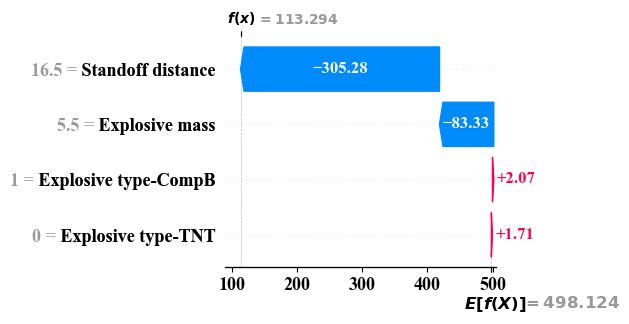

In [53]:
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)
shap.waterfall_plot(shap_values2[4], show=False)
plt.gcf()
plt.gcf().set_size_inches(3.5,3)
plt.rcParams['font.weight'] = 'bold'

plt.savefig('Images/SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
shap.waterfall_plot(shap_values2[25], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff_distance",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')
plt.ylim([-200,200])

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))

In [ ]:
#Force plot (Instance representation)
row_to_show = 5
shap_values3 = explainer.shap_values(X_test.iloc[row_to_show])
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values3, X_test.iloc[row_to_show])

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values3,  X_test.iloc[row_to_show])